In [15]:
import pandas as pd
#df=pd.read_csv('C:\DS&AI\Vimala\Python\interview\2019 Winter Data Science Intern Challenge Data Set.csv')
df=pd.read_csv('C:\DS&AI\Vimala\Python\interview\DS.csv')
#df= pd.read_excel('C:\DS&AI\Vimala\Python\interview\2019 Winter Data Science Intern Challenge Data Set (1).xlsx')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


There are no Null values and except for payment_method and created_at field, the type is numerical

In [17]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The AOV is 3145.13 but the 50%(median) is 284. Which means there are outliers

May be some sellers are selling the product for more amount. 


In [39]:
df['price']=df['order_amount']/df['total_items']
df1=df[['shop_id','price']].drop_duplicates()
df1=df1.sort_values(by='price',ascending=False)
df1.head()

,shop_id,price
160,78,25725.0
15,42,352.0
107,12,201.0
205,89,196.0
44,99,195.0


Checking visually which shop sells for more amount
We can see that shop number 78 sells each sneaker for >25000 dollers which is very much greater than the second largest value that is 352

<AxesSubplot:xlabel='shop_id', ylabel='price'>

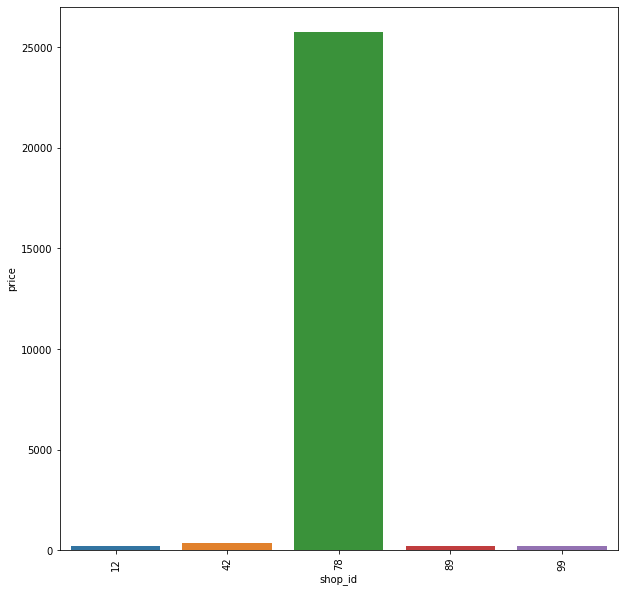

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(data=df1.head(),y='price',x='shop_id')

In [37]:
df1[df1['shop_id'] == 78]

,shop_id,price
160,78,25725.0


In [58]:
df[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price
160,161,78,990,25725,1,credit_card,12-03-2017 05:56,25725.0
490,491,78,936,51450,2,debit,26-03-2017 17:08,25725.0
493,494,78,983,51450,2,cash,16-03-2017 21:39,25725.0
511,512,78,967,51450,2,cash,09-03-2017 07:23,25725.0
617,618,78,760,51450,2,cash,18-03-2017 11:18,25725.0
691,692,78,878,154350,6,debit,27-03-2017 22:51,25725.0
1056,1057,78,800,25725,1,debit,15-03-2017 10:16,25725.0
1193,1194,78,944,25725,1,debit,16-03-2017 16:38,25725.0
1204,1205,78,970,25725,1,credit_card,17-03-2017 22:32,25725.0
1259,1260,78,775,77175,3,credit_card,27-03-2017 09:27,25725.0


In [45]:
df2 = df[df['shop_id'] != 78]

In [53]:
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,price
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


In [91]:
df2.groupby(by=['total_items'],as_index=False).mean()

,total_items,order_id,shop_id,user_id,order_amount,price
0,1,2519.954721,50.029818,851.972391,151.850911,151.850911
1,2,2507.092511,49.707599,848.227974,303.520925,151.760463
2,3,2467.508584,49.879828,850.748927,457.326180,152.442060
3,4,2434.184932,49.743151,845.589041,598.534247,149.633562
4,5,2375.415584,47.272727,840.922078,759.350649,151.870130
5,6,3277.250000,64.000000,828.625000,888.750000,148.125000
6,8,4142.000000,54.000000,733.000000,1064.000000,133.000000
7,2000,2336.235294,42.000000,607.000000,704000.000000,352.000000


In [76]:
df[df['total_items']==2000].sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price
520,521,42,607,704000,2000,credit_card,02-03-2017 04:00,352.0
4646,4647,42,607,704000,2000,credit_card,02-03-2017 04:00,352.0
60,61,42,607,704000,2000,credit_card,04-03-2017 04:00,352.0
15,16,42,607,704000,2000,credit_card,07-03-2017 04:00,352.0
2297,2298,42,607,704000,2000,credit_card,07-03-2017 04:00,352.0
1436,1437,42,607,704000,2000,credit_card,11-03-2017 04:00,352.0
2153,2154,42,607,704000,2000,credit_card,12-03-2017 04:00,352.0
1362,1363,42,607,704000,2000,credit_card,15-03-2017 04:00,352.0
1602,1603,42,607,704000,2000,credit_card,17-03-2017 04:00,352.0
1562,1563,42,607,704000,2000,credit_card,19-03-2017 04:00,352.0


In [87]:
df3 = df2[df2['total_items'] != 2000]

In [88]:
df3.describe()

,order_id,shop_id,user_id,order_amount,total_items,price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


There is not much difference between the mean and 50 th percentile value. 
So we can conclude that we do not have any garbage or outliers and the Average order value will be useful when we use it.